# From the Cancer Dataset

# Decision Tree

# Breast Cancer Wisconsin (Original) Data Set
Data Set Characteristics:  Multivariate
Number of Instances:699
Attribute Characteristics:Integer
Number of Attributes:10
Associated Tasks:Classification

Attribute Information:
1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

#Run pip install mglean in the command prompt to add mglean to your anaconda search path.

In [1]:
##Using logistic regression to work with cancer dataset
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()


In [2]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=4)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.951


This is a clear case of Overfitting. 
Let us see how to deal with this using Tree Pruning

# Tree Pruning in Decision Tree
Pre Pruning

In [9]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 0.984
Accuracy on the test subset: 0.958


# Visulalizations in Decision Tree using Graphviz
 Run pip install graphviz from cmd and them use graphviz
Also install graphviz for your OS from ::https://graphviz.gitlab.io/download/

In [11]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='cancertree.dot', class_names=['malignant', 'benign'], 
                feature_names=cancer.feature_names,
               impurity=False, filled=True)

ModuleNotFoundError: No module named 'graphviz'

To make the graph visible, do the following:
1. Install  graphviz
2. Set the path to the graphviz bin directory in cmd:
set path=C:\Program Files (x86)\Graphviz2.38\bin
3. Run the below command in cmd to save the .dot img as a png :
dot -Tpng cancertree.dot -o cancertree.png 
    
C:\Users\nishi.sood>cd C:\Users\nishi.sood\ML_UsingPython\Day2
C:\Users\nishi.sood\ML_UsingPython\Day2>set path=C:\Program Files (x86)\Graphviz2.38\bin
C:\Users\nishi.sood\ML_UsingPython\Day2>dot -Tpng cancertree.dot -o cancertree.png
    
4. run the below command in Jypyter notebook in the Markdown mode:
    #![](cancertree.png)


![](cancertree.png)

The above graphs tells us how the predictions are made.
Features weights and importance attached with each node

# Feature importance representation as a numpy array and as a Graphical representation

In [12]:
##feature_importances_ tells how much important is the feature important and has a value between 0 and 1
print('Feature importances: {}'.format(tree.feature_importances_))
type(tree.feature_importances_)

Feature importances: [0.         0.04216439 0.         0.         0.         0.
 0.00803685 0.07515861 0.         0.         0.01033126 0.
 0.         0.         0.         0.         0.         0.03060187
 0.         0.         0.         0.01607371 0.75798488 0.
 0.0050586  0.         0.01033798 0.04425183 0.         0.        ]


numpy.ndarray

In [13]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

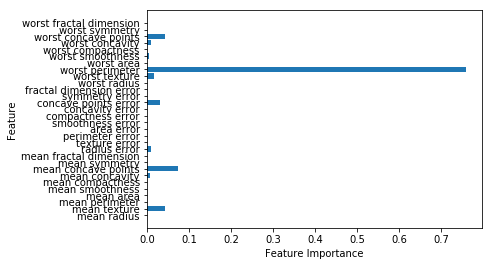

In [16]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Advantages of Decision Trees and Disadvantages
easy to view and understand

no need to pre-process, normalize, scale, and/or standardize features

Paramaters to work with
max_depth
min_samples_leaf, max_samples_leaf
max_leaf_nodes
etc.

Main Disadvantages

tendency to overfit

poor generalization

# Ensemble Methods :: Random Forests

Randon Forest is basically a collection of decision trees.
Decision Tree has a good Predictive capacity but is prone to overfitting
Random Forest deals with the issue of overfitting of the decision tree by combining multiple decision trees.
Combining trees retains the predictive power but can reduce the overfitting by averaging the results

In Random Forests we need to provide the parameter estimator that specifics how many trees to create.



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

#instantiate the data
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# instantiate the classifier
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.972


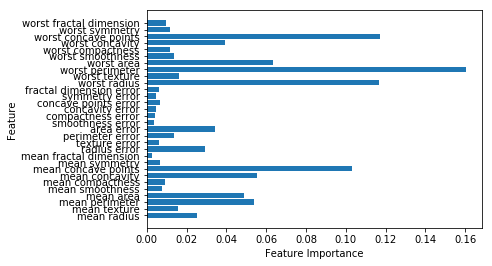

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n_features = cancer.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()